# Web Scraping de `lazone.org` avec Selenium et Chrome

_Webscraping<br>
Analyse de texte<br>
Dataviz_

![intro](images/logo.png)

## Prérequis

Installer le dernière version de ChromeDriver : https://chromedriver.chromium.org/downloads. A noter qu'il faut avoir installé chrome, et qu'il faut choisir la version du driver qui correspond à votre version de chrome.

Installer selenium :

In [1]:
!pip install selenium

In [2]:
!pip install nltk

In [3]:
#Importing packages
from selenium import webdriver
import pandas as pd
import numpy as np
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Scraping

![lazone.png](lazone.png)

Les pages à scrapper sont les suivantes :

In [4]:
page_best_of = "https://www.lazone.org/articles/bestOf.html"
page_worst_of = "https://www.lazone.org/articles/worstOf.html"

Nous allons scraper les textes ayant des meilleures notes (note > 8/10) et les pires (note < 1/10) du site `lazone.org`.

Nous enregisterons :
- le nom de l'auteur
- le titre de l'oeuvre
- la date
- le résumé
- le texte

In [5]:
driver = webdriver.Chrome('C:/Users/utilisateur/chromedriver.exe')

In [6]:
def scrap_text(page):
    driver.get(page)
    list_of_texts = driver.find_elements_by_xpath('//*[@id="main"]/div/ol/li')

    df = pd.DataFrame(columns = ['Date', 'Title', 'Author','Abstract', 'Link', 'Content']) # creation d'un dataframe
    for i in range(1, len(list_of_texts)+1):

        #Extract date and abstract
        comment_element = driver.find_elements_by_xpath(f'//*[@id="main"]/div/ol/li[{i}]')
        comment = comment_element[0].text
        date = comment.split(") :")[0][-10:]
        abstract = comment.split(") :")[1]

        #Extract title
        title_element = driver.find_elements_by_xpath(f'//*[@id="main"]/div/ol/li[{i}]/a[1]')[0]
        title = title_element.text

        #Extract author 
        author_element = driver.find_elements_by_xpath(f'//*[@id="main"]/div/ol/li[{i}]/a[2]')[0]
        author = author_element.text
        
        #Extract link to full text
        link_element = driver.find_elements_by_xpath(f'//*[@id="main"]/div/ol/li[{i}]/a[1]')[0].get_property("href")

        #Adding references to the dataframe    
        df.loc[len(df)] = [date, title, author, abstract, link_element, None]
    return df

In [7]:
df_best = scrap_text(page_best_of)

In [8]:
df_worst = scrap_text(page_worst_of)

In [9]:
# retraitement de la date
df_best['Date'] = pd.to_datetime(df_best['Date'])
df_worst['Date'] = pd.to_datetime(df_worst['Date'])

### Récupération du texte à partir des links

In [10]:
def scrap_full_text(df):
    for i in df.index:
        link = df['Link'][i]
        driver.get(link)
        content1 = driver.find_elements_by_xpath('//*[@id="main"]/div[2]/div[2]/div[2]/div[1]')
        content2 = driver.find_elements_by_xpath('//*[@id="main"]/div[2]/div[2]/div[2]/div[2]')
        masterpiece = content1[0].text + content2[0].text
        df['Content'][i]=masterpiece

In [11]:
scrap_full_text(df_best)
scrap_full_text(df_worst)

In [12]:
df_best.head(8)

,Date,Title,Author,Abstract,Link,Content
0,2015-01-12,Passer la trentaine,CTRL X,On tient un chef d'œuvre ! Dans le bourbier d...,https://www.lazone.org/articles/2617.html,"Donc, je tiens mon gosse par la main et ce mer..."
1,2017-07-20,La vie est un chef d'oeuvre d'humour juif,CTRL X,Contribution extraordinaire de notre Grand In...,https://www.lazone.org/articles/3088.html,Dans le cadre de l'appel à texte testamentaire...
2,2017-09-13,L'Anémone Couronnée,Clacker,Avec la première contribution à l'appel à tex...,https://www.lazone.org/articles/3136.html,Tout me semble étrange aujourd'hui. Réfléchiss...
3,2005-07-24,Le texte dont je suis le héros,Nounourz,(Texte remanié et rallongé) Ce mastodonte est...,https://www.lazone.org/articles/903.html,"Il n’y a rien à raconter. Pas d’histoire, pas ..."
4,2003-11-21,Arch-nemesis,nihil,(Article initialement paru le 01/11/03 sous l...,https://www.lazone.org/articles/589.html,Du plus loin que je me souvienne - mais les im...
5,2006-05-16,En route vers le clochard ! (venez je vous emm...,Obn,L'écriture inventive et fluide d'Obn est très...,https://www.lazone.org/articles/1414.html,En ce temps là je lisais Harry Potter mais j'a...
6,2014-01-08,En Plein cœur. PAN! Pas ailleurs. (1),Valstar Karamzin,Quand on a l'impudence de poster sur la Zone ...,https://www.lazone.org/articles/2506.html,UN : DEUIL EN ROSE ET NOIR - (Hendrix Von Volo...
7,2015-08-19,Balistique - Version 2,Narak,à l'occasion de la sortie du N°2 de LRQTP pré...,https://www.lazone.org/articles/2594.html,[ réécriture de Balistique de Narak ]\n[ Remix...


In [13]:
df_worst.head(8)

,Date,Title,Author,Abstract,Link,Content
0,2006-07-04,"? rire, la mort ?",Aure,Ce texte m'a fait me demander si je devais pa...,https://www.lazone.org/articles/1361.html,le rire: marquer un sentiment de gaieter\nla m...
1,2002-01-21,Fin de soirée,Amanite,Retranscription d'un tas de conneries écrites...,https://www.lazone.org/articles/1.html,Phrases copiées à la volée sur une assiette en...
2,2002-08-05,Erections,Fresbee,Réaction de Fresbee au résultat du second tou...,https://www.lazone.org/articles/63.html,"Nouvel auteur, nouvel article !\n\nL'auteur : ..."
3,2004-02-07,Crying like a diplodocus,Narak,"Un texte de chanson imaginaire en anglais, en...",https://www.lazone.org/articles/752.html,"Hey! Ladies and gentlemen, put your hands toge..."
4,2007-08-26,Jolie fille mais dangeureuse,Shell,Enorme. Ca faisait longtemps qu'on avait pas ...,https://www.lazone.org/articles/1796.html,c'est aujourd'hui que des personnes sans rende...
5,2009-09-13,Pulsion,Reteex,Voilà un concurrent super sérieux pour le con...,https://www.lazone.org/articles/2187.html,Ce text a pour bute de sensibiliser les jeunes...
6,2017-01-13,"Le changement ? Une prière, une tape sur le cu...",Le Docteur Burz,Après les remarques de M. Burz sur l'organisa...,https://www.lazone.org/articles/2981.html,Les sentiers de la perdition sont proches… mai...
7,2012-10-23,MORBIDE ANTAGONISME,Abysmal,"Ici, vous pourrez admirer de vos yeux ébahis ...",https://www.lazone.org/articles/2453.html,"Depuis que sa dernière bougie s'était éteinte,..."


### Enregistrement des données pour mise en base

In [14]:
# sauvegarde au format csv pour import mysql
df_best.to_csv('best_abstracts.csv') 
df_worst.to_csv('worst_abstracts.csv')

## Retraitement des données

In [15]:
# prétraitement

import re
import unicodedata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('french')
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("french")

def pretraitement(text):
    text = text.lower() 
    text = ''.join((c for c in unicodedata.normalize('NFD', text) 
                    if unicodedata.category(c) != 'Mn')) #
    
    text = re.sub('\[[^]]*\]', ' ', text)
    text = re.sub('[^a-zA-Z]', ' ', text)

    words = text.split(" ")
    words = list(filter(None, words))

    words = [word for word in words if word not in stop_words] #suppression des mots vides
    #words = [stemmer.stem(word) for word in words]
    text = " ".join(words)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Recherche les mots les plus courants dans les oeuvres

In [16]:
textG = str()
for i in df_best.index :
    textG += pretraitement(df_best['Content'].iloc[i])
for i in df_worst.index :
    textG += pretraitement(df_worst['Content'].iloc[i])

wordsG = textG.split(' ')

In [17]:
from collections import Counter

counts = Counter(wordsG)
counts.most_common(100)

[('a', 18282),
 ('plus', 4096),
 ('tout', 3015),
 ('etait', 2926),
 ('ca', 2760),
 ('comme', 2625),
 ('bien', 2248),
 ('meme', 1777),
 ('sans', 1708),
 ('si', 1660),
 ('cette', 1649),
 ('fait', 1595),
 ('etre', 1556),
 ('faire', 1543),
 ('rien', 1354),
 ('alors', 1203),
 ('peu', 1186),
 ('deux', 1156),
 ('encore', 1120),
 ('temps', 1018),
 ('quand', 1017),
 ('tous', 972),
 ('aussi', 910),
 ('puis', 906),
 ('autre', 904),
 ('fois', 889),
 ('sous', 882),
 ('non', 839),
 ('yeux', 808),
 ('avant', 801),
 ('tres', 786),
 ('jamais', 782),
 ('peut', 779),
 ('vers', 771),
 ('vie', 764),
 ('trop', 763),
 ('apres', 757),
 ('tete', 754),
 ('monde', 754),
 ('toute', 733),
 ('etais', 726),
 ('entre', 725),
 ('dit', 714),
 ('toujours', 703),
 ('autres', 702),
 ('jusqu', 672),
 ('leurs', 659),
 ('quelques', 657),
 ('avoir', 629),
 ('ete', 629),
 ('corps', 625),
 ('jour', 624),
 ('depuis', 623),
 ('sais', 622),
 ('va', 613),
 ('deja', 605),
 ('quoi', 597),
 ('bon', 594),
 ('dire', 591),
 ('etaient', 5

Etant donnée la distribution, on choisit de supprimer les mots qui apparaissent plus de 800 fois dans les textes, qu'ils soient bons ou mauvais.

In [18]:
commons_text = [counts.most_common()[i][0] for i in range(34)]
print("Suppression des mots les plus couramment rencontrés jusqu'à '{}'.".format(commons_text[-1:][0]))

Suppression des mots les plus couramment rencontrés jusqu'à 'vers'.


###### Recherche des mots les plus courants dans les résumés (critiques)

In [19]:
abstractG = str()
for i in df_best.index :
    abstractG += pretraitement(df_best['Abstract'].iloc[i])
for i in df_worst.index :
    abstractG += pretraitement(df_worst['Abstract'].iloc[i])

wordsAbstractG = abstractG.split(' ')

In [20]:
counts = Counter(wordsAbstractG)
counts.most_common(70)

[('a', 986),
 ('texte', 288),
 ('bien', 215),
 ('ca', 200),
 ('plus', 196),
 ('tout', 166),
 ('fait', 125),
 ('cette', 118),
 ('meme', 115),
 ('peu', 111),
 ('tres', 108),
 ('si', 107),
 ('comme', 106),
 ('etre', 101),
 ('zone', 88),
 ('sans', 88),
 ('auteur', 79),
 ('peut', 73),
 ('faire', 69),
 ('bon', 68),
 ('tous', 66),
 ('aussi', 59),
 ('rien', 58),
 ('con', 57),
 ('saint', 56),
 ('quelques', 56),
 ('entre', 54),
 ('donc', 53),
 ('textes', 52),
 ('autres', 52),
 ('ici', 52),
 ('alors', 51),
 ('trop', 50),
 ('vie', 46),
 ('non', 45),
 ('temps', 44),
 ('encore', 44),
 ('ecrit', 43),
 ('moins', 43),
 ('style', 43),
 ('genre', 42),
 ('fois', 42),
 ('grand', 41),
 ('partie', 40),
 ('lire', 40),
 ('narrateur', 39),
 ('deux', 39),
 ('toujours', 39),
 ('quoi', 38),
 ('episode', 37),
 ('jamais', 36),
 ('fin', 36),
 ('mal', 36),
 ('suite', 36),
 ('nouvelle', 35),
 ('apres', 35),
 ('etait', 35),
 ('cet', 35),
 ('toute', 34),
 ('monde', 34),
 ('puis', 34),
 ('assez', 34),
 ('histoire', 34),
 

In [21]:
commons_abstract = [counts.most_common()[i][0] for i in range(50)]
print("Suppression des mots les plus couramment rencontrés jusqu'à '{}'.".format(commons_abstract[-1:][0]))

Suppression des mots les plus couramment rencontrés jusqu'à 'episode'.


#### Second traitement : suppression des mots les plus courants dans l'abstract et le texte

In [22]:
def traitement2(text, most_commons):
    words = text.split(" ")
    words = [word for word in words if word not in most_commons] #suppression des mots courants
    text = " ".join(words)
    return text

##### Wordcloud des oeuvre figurant au Best-Of et au Worst-Of 

In [23]:
best_text = str()
for i in df_best.index :
    best_text += traitement2(pretraitement(df_best['Content'].iloc[i]), commons_text)

In [24]:
worst_text = str()
for i in df_worst.index :
    worst_text += traitement2(pretraitement(df_worst['Content'].iloc[i]), commons_text)

In [25]:
wcloud_best = WordCloud(max_font_size=50, background_color='white').generate(best_text)
wcloud_worst = WordCloud(max_font_size=50, background_color='white').generate(worst_text)

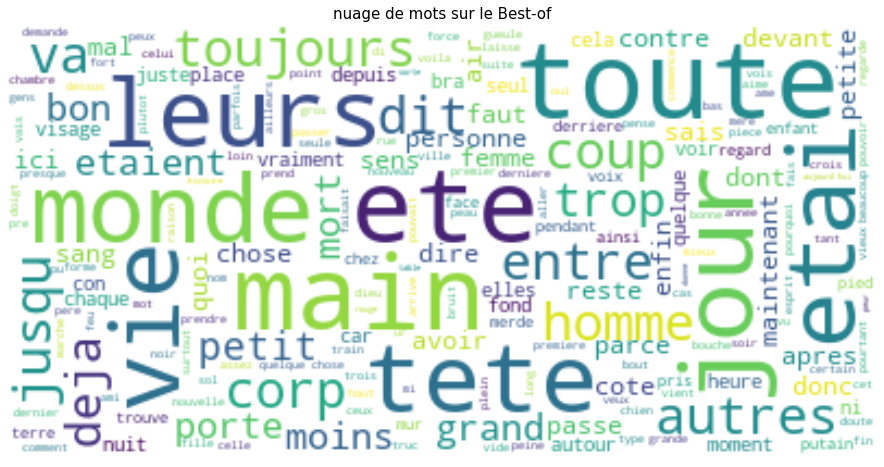

In [26]:
plt.figure(figsize=(16,8))
plt.imshow(wcloud_best, interpolation='bilinear')
plt.axis("off")
plt.title("nuage de mots sur le Best-of", fontsize=15)
plt.savefig('images/wcl_best.png')

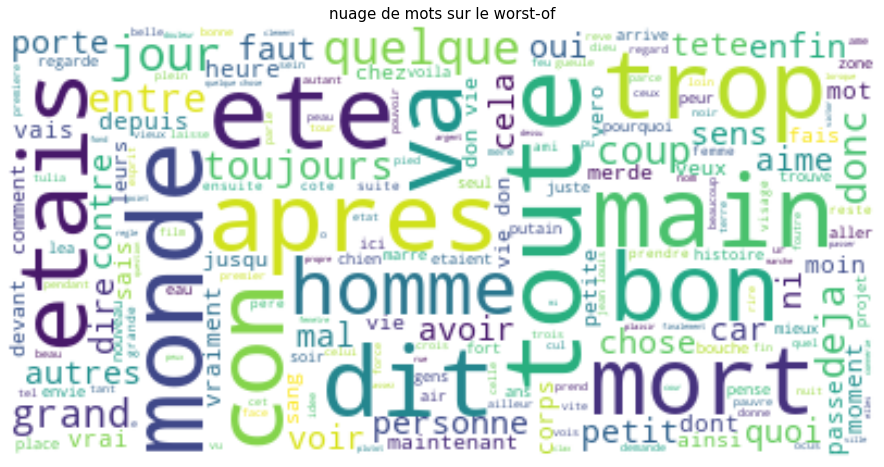

In [27]:
plt.figure(figsize=(16,8))
plt.imshow(wcloud_worst, interpolation='bilinear')
plt.axis("off")
plt.title("nuage de mots sur le worst-of", fontsize=15)
plt.savefig('images/wcl_worst.png')

##### Wordcloud des Résumés (critiques) des textes Best-Of et du Worst-Of 

In [28]:
best_abstract = str()
for i in df_best.index :
    best_abstract += traitement2(pretraitement(df_best['Abstract'].iloc[i]), commons_abstract)

In [29]:
worst_abstract = str()
for i in df_worst.index :
    worst_abstract += traitement2(pretraitement(df_worst['Abstract'].iloc[i]), commons_abstract)

In [30]:
wcloud_best_abstract = WordCloud(max_font_size=40, background_color="red").generate(best_abstract)
wcloud_worst_abstract = WordCloud(max_font_size=40, background_color='red').generate(worst_abstract)

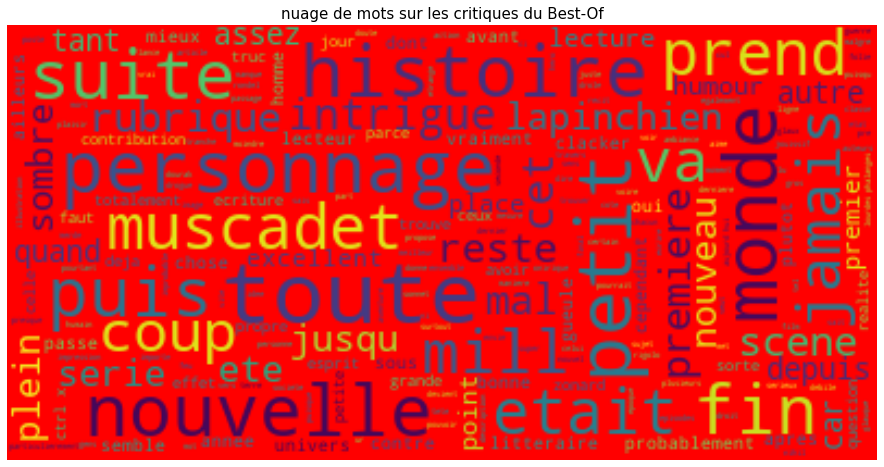

In [31]:
plt.figure(figsize=(16,8))
plt.imshow(wcloud_best_abstract, interpolation='bilinear')
plt.axis("off")
plt.title("nuage de mots sur les critiques du Best-Of", fontsize=15)
plt.savefig('images/wcl_best_abstract.png')

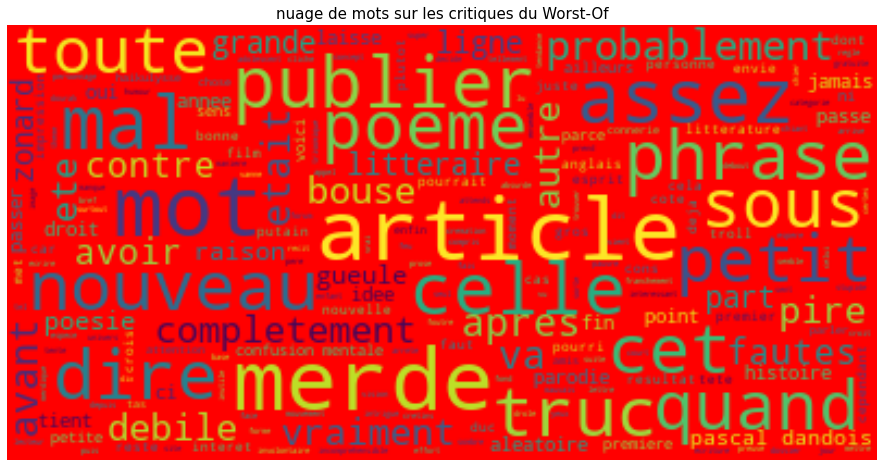

In [32]:
plt.figure(figsize=(16,8))
plt.imshow(wcloud_worst_abstract, interpolation='bilinear')
plt.axis("off")
plt.title("nuage de mots sur les critiques du Worst-Of", fontsize=15)
plt.savefig('images/wcl_worst_abstract.png')

## Autres visualisations

In [33]:
import seaborn as sns

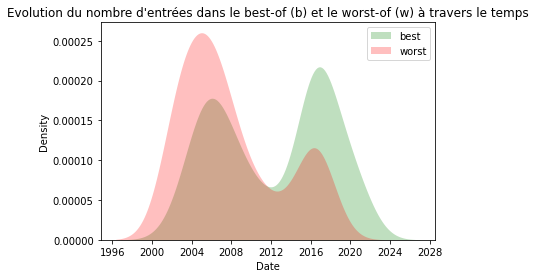

<Figure size 432x288 with 0 Axes>

In [34]:
sns.kdeplot(data=df_best, x="Date", fill=True, linewidth=0, color="green")
sns.kdeplot(data=df_worst, x="Date", fill=True, linewidth=0, color="red")
plt.title("Evolution du nombre d'entrées dans le best-of (b) et le worst-of (w) à travers le temps")
plt.legend(["best","worst"])
plt.show()
plt.savefig('images/viz1.png')

In [35]:
pires = (df_worst.Author.value_counts())
print("¤   10 pires auteurs :") 
print(pires[:10])
meilleurs = (df_best.Author.value_counts())
print("------\n¤   10 meilleurs auteurs :") 
print(meilleurs[:10])
print("------\n¤   Auteurs figurants dans les deux listes :")
print(list(set(meilleurs.index) & set(pires.index)))

¤   10 pires auteurs :
HaiKulysse             6
pascal dandois         6
Le Duc                 5
Zone Inc.              5
Narak                  3
Khalid EL Morabethi    3
Arkanya                3
Shirow                 3
Amanite                3
Lapinchien             2
Name: Author, dtype: int64
------
¤   10 meilleurs auteurs :
nihil                23
Lapinchien           20
Dourak Smerdiakov    20
CTRL X               18
Clacker              18
Mill                 16
Muscadet             14
Glaüx-le-Chouette    11
Hag                   6
Narak                 6
Name: Author, dtype: int64
------
¤   Auteurs figurants dans les deux listes :
['Erreur', 'Glaüx-le-Chouette', 'Wilhelm', 'LePouilleux', 'Lapinchien', 'Kirunaa', 'nihil', 'Narak', 'HaiKulysse', 'Konsstrukt', 'pascal dandois', 'Tulia', 'Arkanya', 'Lourdes Phalanges']


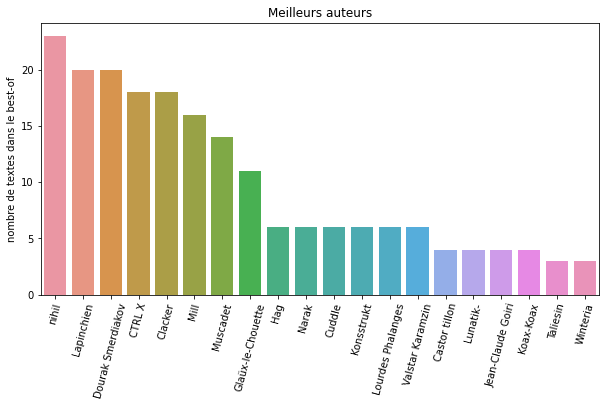

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(10,5))
head = meilleurs.sort_values(ascending=False).head(20)
sns.barplot(head.index, head.values)
plt.xticks(rotation=75)
plt.title("Meilleurs auteurs")
plt.ylabel("nombre de textes dans le best-of")
plt.show()
plt.savefig('images/viz2.png')

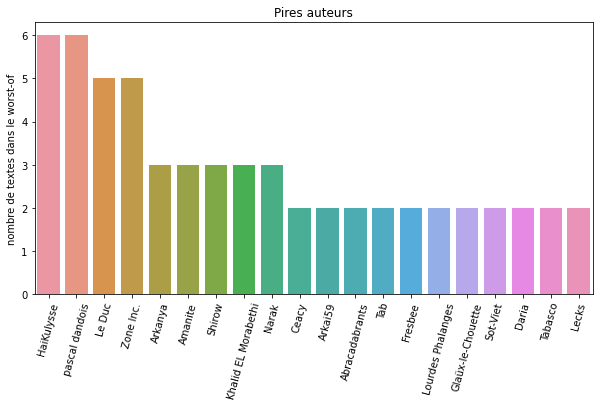

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(10,5))
head = pires.sort_values(ascending=False).head(20)
sns.barplot(head.index, head.values)
plt.xticks(rotation=75)
plt.title("Pires auteurs")
plt.ylabel("nombre de textes dans le worst-of")
plt.show()
plt.savefig('images/viz3.png')

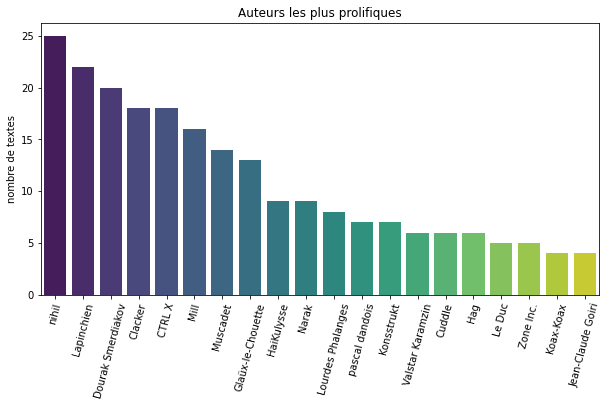

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize=(10,5))
dfAuthors = pd.concat((df_best[["Author"]], df_worst[["Author"]]), axis=0)
ecrivains = dfAuthors.Author.value_counts()
head = ecrivains.sort_values(ascending=False).head(20)
sns.barplot(head.index, head.values, palette="viridis")
plt.xticks(rotation=75)
plt.title("Auteurs les plus prolifiques")
plt.ylabel("nombre de textes")
plt.show()
plt.savefig('images/viz4.png')